In [174]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Подготовка данных

In [175]:
df_r = pd.read_csv('../data/regression/avocado_preprocessed.csv')
df_r.drop(columns='Unnamed: 0', inplace=True)
# Выделяем матрицу признаков и вектор целевый значений из датасета
X = df_r.drop(['y', 'date'], axis=1)
y = df_r['y']
X

total_volume     4046       4225    4770  total_bags  small_bags  \
0          64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1          54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2         118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3          78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4          51039.60   941.48   43838.39   75.78     6183.95     5986.26   
...             ...      ...        ...     ...         ...         ...   
18244      17074.83  2046.96    1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70    3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92    2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63    2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77    2356.13  224.53    12014.15    11988.14   

       large_bags  xlarge_bags  year  month  ...  region_SouthCentral  \
0           93.25          0.0  2015     12  ...                    0   
1           97.49          0.0  2015     12  ...                    0   
2          103.14          0.0  2015     12  ...                    0   
3          133.76          0.0  2015     12  ...                    0   
4          197.69          0.0  2015     11  ...                    0   
...           ...          ...   ...    ...  ...                  ...   
18244      431.85          0.0  2018      2  ...                    0   
18245      324.80          0.0  2018      1  ...                    0   
18246       42.31          0.0  2018      1  ...                    0   
18247       50.00          0.0  2018      1  ...                    0   
18248       26.01          0.0  2018      1  ...                    0   

       region_Southeast  region_Spokane  region_StLouis  region_Syracuse  \
0                     0               0               0                0   
1                     0               0               0                0   
2                     0               0               0                0   
3                     0               0               0                0   
4                     0               0               0                0   
...                 ...             ...             ...              ...   
18244                 0               0               0                0   
18245                 0               0               0                0   
18246                 0               0               0                0   
18247                 0               0               0                0   
18248                 0               0               0                0   

       region_Tampa  region_TotalUS  region_West  region_WestTexNewMexico  \
0                 0               0            0                        0   
1                 0               0            0                        0   
2                 0               0            0                        0   
3                 0               0            0                        0   
4                 0               0            0                        0   
...             ...             ...          ...                      ...   
18244             0               0            0                        1   
18245             0               0            0                        1   
18246             0               0            0                        1   
18247             0               0            0                        1   
18248             0               0            0                        1   

       type_organic  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
18244             1  
18245             1  
18246             1  
18247             1  
18248             1  

[18249 rows x 65 columns]

In [176]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Преобразуем числовые признаки путём их скалирования
sc.fit(X.iloc[:,:7])
X.iloc[:,:7] = pd.DataFrame(sc.transform(X.iloc[:,:7]))
X

total_volume      4046      4225      4770  total_bags  small_bags  \
0         -0.227716 -0.230816 -0.199902 -0.212091   -0.234170   -0.232647   
1         -0.230427 -0.231103 -0.208054 -0.211997   -0.233350   -0.231568   
2         -0.212085 -0.231007 -0.154478 -0.211325   -0.234730   -0.233399   
3         -0.223444 -0.230741 -0.185350 -0.211864   -0.237096   -0.236568   
4         -0.231538 -0.230891 -0.208719 -0.211834   -0.236718   -0.236154   
...             ...       ...       ...       ...         ...         ...   
18244     -0.241373 -0.230017 -0.243857 -0.212540   -0.229301   -0.226665   
18245     -0.242296 -0.230693 -0.242277 -0.212540   -0.233594   -0.232196   
18246     -0.242331 -0.230693 -0.243090 -0.205766   -0.233463   -0.231644   
18247     -0.241625 -0.230428 -0.242651 -0.205774   -0.231866   -0.229543   
18248     -0.241253 -0.229347 -0.243170 -0.210450   -0.230807   -0.228111   

       large_bags  xlarge_bags  year  month  ...  region_SouthCentral  \
0       -0.222352          0.0  2015     12  ...                    0   
1       -0.222335          0.0  2015     12  ...                    0   
2       -0.222311          0.0  2015     12  ...                    0   
3       -0.222186          0.0  2015     12  ...                    0   
4       -0.221924          0.0  2015     11  ...                    0   
...           ...          ...   ...    ...  ...                  ...   
18244   -0.220964          0.0  2018      2  ...                    0   
18245   -0.221403          0.0  2018      1  ...                    0   
18246   -0.222561          0.0  2018      1  ...                    0   
18247   -0.222529          0.0  2018      1  ...                    0   
18248   -0.222628          0.0  2018      1  ...                    0   

       region_Southeast  region_Spokane  region_StLouis  region_Syracuse  \
0                     0               0               0                0   
1                     0               0               0                0   
2                     0               0               0                0   
3                     0               0               0                0   
4                     0               0               0                0   
...                 ...             ...             ...              ...   
18244                 0               0               0                0   
18245                 0               0               0                0   
18246                 0               0               0                0   
18247                 0               0               0                0   
18248                 0               0               0                0   

       region_Tampa  region_TotalUS  region_West  region_WestTexNewMexico  \
0                 0               0            0                        0   
1                 0               0            0                        0   
2                 0               0            0                        0   
3                 0               0            0                        0   
4                 0               0            0                        0   
...             ...             ...          ...                      ...   
18244             0               0            0                        1   
18245             0               0            0                        1   
18246             0               0            0                        1   
18247             0               0            0                        1   
18248             0               0            0                        1   

       type_organic  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
18244             1  
18245             1  
18246             1  
18247             1  
18248             1  

[18249 rows x 65 columns]

In [177]:
from sklearn.model_selection import train_test_split
test_size=0.30
train_inx  = round(len(X) * (1 - test_size))
# Разделяем данные на обучение и тест в соотношении 70%\30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
# Если пробовать разбивать с сохранением по дате, то результаты будут заметно хуже
# X_train, X_test, y_train, y_test = X[:train_inx], X[train_inx:], y[:train_inx], y[train_inx:]

## Построение классификационных моделей

In [178]:
# Множество предсказаний наших моделей
models_y_pred = {
    'lr' : [],
    'tree' : [],
    'lasso' : [],
    'ridge' : [],
    'en' : [],
}

In [179]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def root_mean_square_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def print_metrics(y_true, y_pred):
    print(f'R^2 {r2_score(y_true, y_pred)}')
    print(f'MSE {mean_squared_error(y_true, y_pred)}')
    print(f'RMSE {root_mean_square_error(y_true, y_pred)}')
    print(f'MAE {mean_absolute_error(y_true, y_pred)}')

In [180]:
def plot_y_vs_y_pred(y_train, y_test, y_train_pred, y_test_pred, model_name):
    plt.figure(figsize=(16, 6))
    plt.subplot(1,2,1)
    plt.grid(True)
    plt.xlabel(f'Предсказание модели "{model_name}"')
    plt.ylabel('Истинные значения')
    plt.xlim(y_train.min() - y_train.mean() // 3, y_train.max() + y_train.mean() // 3)
    plt.ylim(y_train.min() - y_train.mean() // 3, y_train.max() + y_train.mean() // 3)
    plt.scatter(y_train_pred, y_train, alpha=0.5, color = 'red')
    plt.scatter(y_test_pred, y_test, alpha=0.5, color = 'blue')
    plt.title(model_name)

### Линейная регрессия (Linear regression)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression

In [181]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
models_y_pred['lr'] = (regressor.predict(X_train).copy(), y_pred.copy())

print_metrics(y_test, y_pred)

R^2 0.5920399331048357
MSE 0.06639452660291219
RMSE 0.257671353865563
MAE 0.19654949828015922


### Регрессия дерева решений (Decision Tree Regression)

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html?highlight=decision%20tree%20regression

In [182]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
models_y_pred['tree'] = (regressor.predict(X_train).copy(), y_pred.copy())

print_metrics(y_test, y_pred)

R^2 0.7830793103057606
MSE 0.03530332420091324
RMSE 0.18789178854040758
MAE 0.1234283105022831


### LASSO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso

In [183]:
from sklearn.linear_model import Lasso

regressor = Lasso()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
models_y_pred['lasso'] = (regressor.predict(X_train).copy(), y_pred.copy())

print_metrics(y_test, y_pred)

R^2 0.013523634078499769
MSE 0.16054667266526898
RMSE 0.40068275813325055
MAE 0.3217830933333003


### Гребневая регрессия (Ridge regression)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge

In [184]:
from sklearn.linear_model import Ridge

regressor = Ridge()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
models_y_pred['ridge'] = (regressor.predict(X_train).copy(), y_pred.copy())

print_metrics(y_test, y_pred)

R^2 0.5920639616568255
MSE 0.06639061601346048
RMSE 0.25766376542591407
MAE 0.19655163811411083


### Elastic Net регрессия (Elastic Net regression)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [185]:
from sklearn.linear_model import ElasticNet

regressor = ElasticNet()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
models_y_pred['en'] = (regressor.predict(X_train).copy(), y_pred.copy())

print_metrics(y_test, y_pred)

R^2 0.013520416558564285
MSE 0.16054719630895445
RMSE 0.4006834115719722
MAE 0.32178329010295253


### Другие модели

In [186]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
models_y_pred['rnd_forest'] = (regressor.predict(X_train).copy(), y_pred.copy())

print_metrics(y_test, y_pred)

R^2 0.8975362499664699
MSE 0.01667573061552511
RMSE 0.12913454462507354
MAE 0.09056299543378994


In [187]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
models_y_pred['XGBR'] = (regressor.predict(X_train).copy(), y_pred.copy())

print_metrics(y_test, y_pred)


R^2 0.905107091247585
MSE 0.015443594277596227
RMSE 0.12427225868067349
MAE 0.09054473885074597


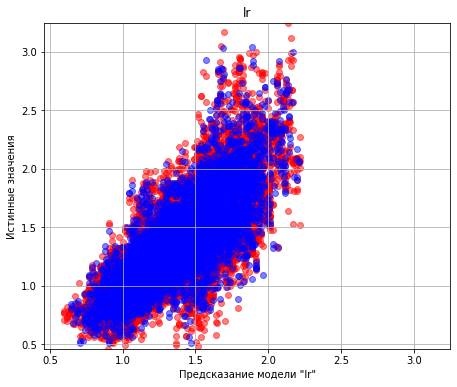

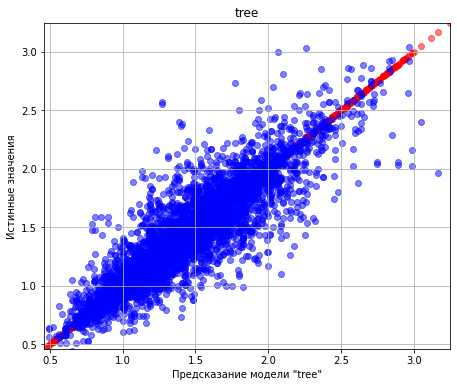

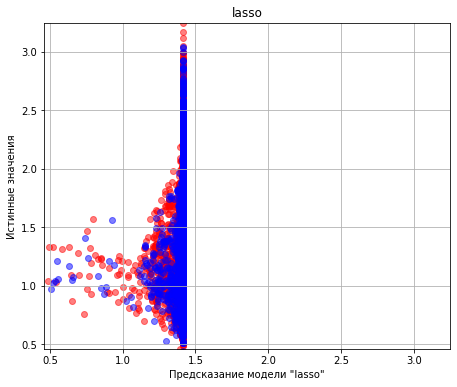

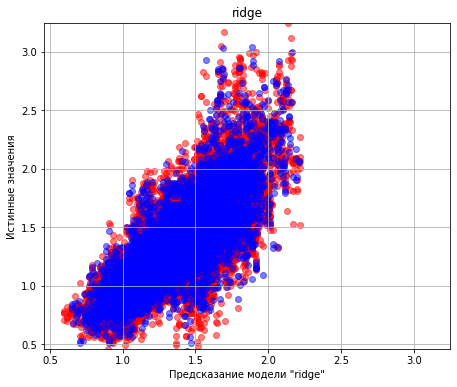

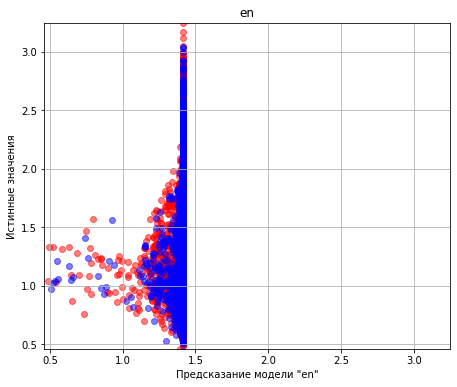

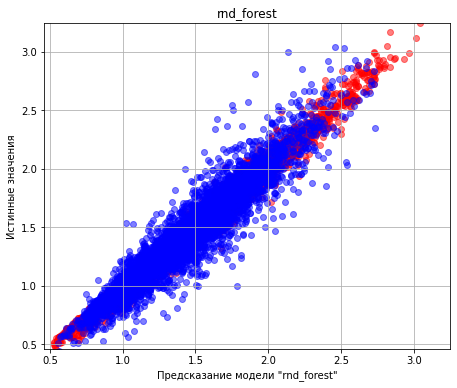

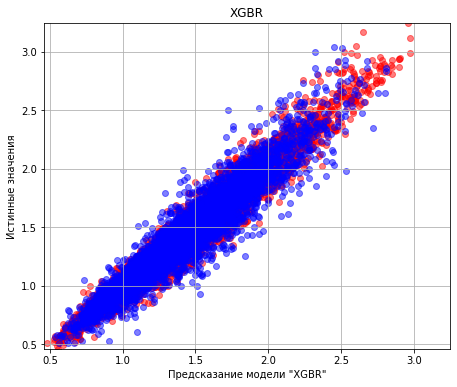

In [188]:
for model in models_y_pred:
    plot_y_vs_y_pred(y_train, y_test, models_y_pred[model][0], models_y_pred[model][1], model)

### Подбор гиперпараметров

In [189]:
from sklearn.model_selection import GridSearchCV

opt_models_y_pred = {
    'opt_lr' : [],
    'opt_tree' : [],
    'opt_lasso' : [],
    'opt_ridge' : [],
    'opt_en' : [],
}

def plot_param_vs_score(params, err_scores, param_name, model_name):
    plt.figure(figsize=(16, 6))
    plt.subplot(1,2,1)
    plt.grid(True)
    plt.xlabel(f'Параметр "{param_name}" модели "{model_name}"')
    plt.ylabel('Значение ошибки')
    plt.plot(params, err_scores)
    plt.title(f'Зависимость ошибки от параметра "{param_name}" для модели "{model_name}"')

### Линейная регрессия (Linear regression)

In [190]:
regressor = LinearRegression()
# Посмотрим на стандартные параметры
regressor.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [191]:
# %%time
parameters = {
    'normalize': [False, True]
}
estimator = GridSearchCV(regressor, parameters, cv=5, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
models_y_pred['opt_lr'] = (estimator.predict(X_train).copy(), y_pred.copy())

print('Наилучший оценщик')
print_metrics(y_test, y_pred)
print('Наилучшие параметры')
print(estimator.best_params_)

Наилучший оценщик
R^2 0.5920399245007639
MSE 0.06639452800320433
RMSE 0.2576713565827687
MAE 0.1965495020478156
Наилучшие параметры
{'normalize': True}


In [192]:
y_pred = models_y_pred['lr'][1]
print('Стандартный оценщик')
print_metrics(y_test, y_pred)

Стандартный оценщик
R^2 0.5920399331048357
MSE 0.06639452660291219
RMSE 0.257671353865563
MAE 0.19654949828015922


### Регрессия дерева решений (Decision Tree Regression)

In [193]:
regressor = DecisionTreeRegressor()
# Посмотрим на стандартные параметры
regressor.get_params(deep=True)

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [194]:
%%time
parameters = {
    'max_depth': range(25),
}
estimator = GridSearchCV(regressor, parameters, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
models_y_pred['opt_tree'] = (estimator.predict(X_train).copy(), y_pred.copy())

print('Наилучший оценщик')
print_metrics(y_test, y_pred)
print('Наилучшие параметры')
print(estimator.best_params_)

d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan -0.10089707 -0.0905485  -0.08338189 -0.0740722  -0.06683207
 -0.05992365 -0.05442193 -0.04903083 -0.04546067 -0.04299793 -0.04136471
 -0.03934496 -0.03927155 -0.03865165 -0.03804596 -0.03770908 -0.03874734
 -0.0383013  -0.03817012 -0.03872875 -0.03889071 -0.03899698 -0.03891415
 -0.03987362]
  warnings.warn(


Наилучший оценщик
R^2 0.7973052503233724
MSE 0.03298808643722917
RMSE 0.1816262272834768
MAE 0.12212410748072812
Наилучшие параметры
{'max_depth': 16}
Wall time: 3.98 s


In [195]:
model_name = 'tree'
y_default_pred = models_y_pred[model_name][1]
print('Стандартный оценщик')
print_metrics(y_test, y_default_pred)

Стандартный оценщик
R^2 0.7830793103057606
MSE 0.03530332420091324
RMSE 0.18789178854040758
MAE 0.1234283105022831


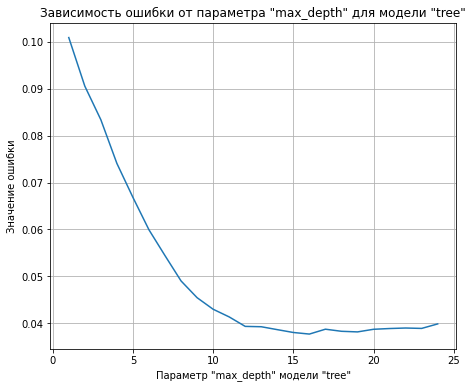

In [196]:
param_name = 'max_depth'
err_scores = estimator.cv_results_['mean_test_score'] * (-1)
plot_param_vs_score(parameters[param_name], err_scores, param_name, model_name)

### LASSO

In [197]:
regressor = Lasso()
# Посмотрим на стандартные параметры
regressor.get_params(deep=True)

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [198]:
%%time
parameters = {
    'alpha': np.arange(0, 1, 0.01),
}
estimator = GridSearchCV(regressor, parameters, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
models_y_pred['opt_lasso'] = (estimator.predict(X_train).copy(), y_pred.copy())

print('Наилучший оценщик')
print_metrics(y_test, y_pred)
print('Наилучшие параметры')
print(estimator.best_params_)

d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420.2117078429724, tolerance: 0.2067482252646
  model = cd_fast.enet_coordinate_descent(


Наилучший оценщик
R^2 0.592059114618531
MSE 0.0663914048573673
RMSE 0.25766529618357087
MAE 0.19650489162429574
Наилучшие параметры
{'alpha': 0.0}
Wall time: 16.7 s


In [199]:
model_name = 'lasso'
y_default_pred = models_y_pred[model_name][1]
print('Стандартный оценщик')
print_metrics(y_test, y_default_pred)

Стандартный оценщик
R^2 0.013523634078499769
MSE 0.16054667266526898
RMSE 0.40068275813325055
MAE 0.3217830933333003


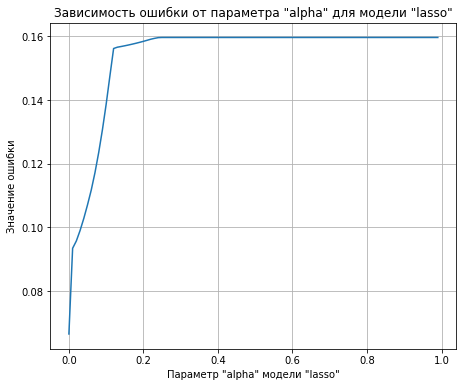

In [200]:
param_name = 'alpha'
err_scores = estimator.cv_results_['mean_test_score'] * (-1)
plot_param_vs_score(parameters[param_name], err_scores, param_name, model_name)

### Гребневая регрессия (Ridge regression)

In [201]:
regressor = Ridge()
# Посмотрим на стандартные параметры
regressor.get_params(deep=True)

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [202]:
%%time
parameters = {
    'alpha': np.arange(0, 400, 1),
}
estimator = GridSearchCV(regressor, parameters, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
models_y_pred['opt_ridge'] = (estimator.predict(X_train).copy(), y_pred.copy())

print('Наилучший оценщик')
print_metrics(y_test, y_pred)
print('Наилучшие параметры')
print(estimator.best_params_)

Наилучший оценщик
R^2 0.5920399053237265
MSE 0.06639453112422136
RMSE 0.2576713626389657
MAE 0.19654945998769227
Наилучшие параметры
{'alpha': 0}
Wall time: 43.8 s


d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.3276e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [203]:
model_name = 'ridge'
y_default_pred = models_y_pred[model_name][1]
print('Стандартный оценщик')
print_metrics(y_test, y_default_pred)

Стандартный оценщик
R^2 0.5920639616568255
MSE 0.06639061601346048
RMSE 0.25766376542591407
MAE 0.19655163811411083


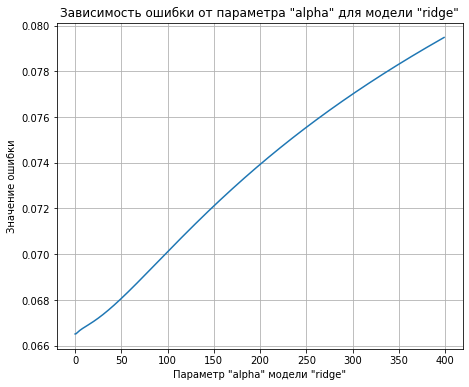

In [204]:
param_name = 'alpha'
err_scores = estimator.cv_results_['mean_test_score'] * (-1)
plot_param_vs_score(parameters[param_name], err_scores, param_name, model_name)

### Elastic Net регрессия (Elastic Net regression)

In [205]:
regressor = ElasticNet()
# Посмотрим на стандартные параметры
regressor.get_params(deep=True)

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [206]:
%%time
parameters = {
    'alpha': np.arange(0, 1, 0.1),
}
estimator = GridSearchCV(regressor, parameters, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
models_y_pred['opt_en'] = (estimator.predict(X_train).copy(), y_pred.copy())

print('Наилучший оценщик')
print_metrics(y_test, y_pred)
print('Наилучшие параметры')
print(estimator.best_params_)

d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420.2117078429724, tolerance: 0.2067482252646
  model = cd_fast.enet_coordinate_descent(


Наилучший оценщик
R^2 0.592059114618531
MSE 0.0663914048573673
RMSE 0.25766529618357087
MAE 0.19650489162429574
Наилучшие параметры
{'alpha': 0.0}
Wall time: 9.71 s


In [207]:
model_name = 'en'
y_default_pred = models_y_pred[model_name][1]
print('Стандартный оценщик')
print_metrics(y_test, y_default_pred)

Стандартный оценщик
R^2 0.013520416558564285
MSE 0.16054719630895445
RMSE 0.4006834115719722
MAE 0.32178329010295253


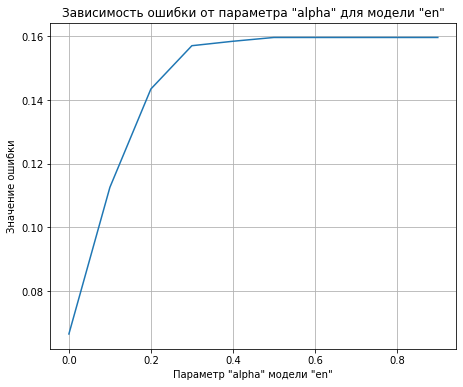

In [208]:
param_name = 'alpha'
err_scores = estimator.cv_results_['mean_test_score'] * (-1)
plot_param_vs_score(parameters[param_name], err_scores, param_name, model_name)


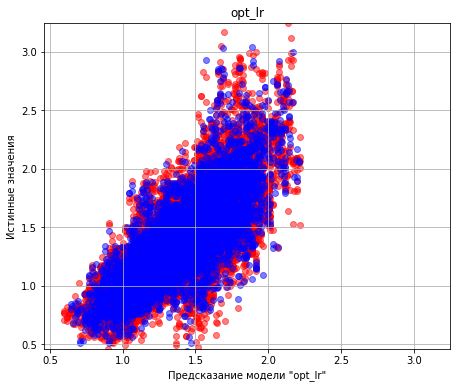

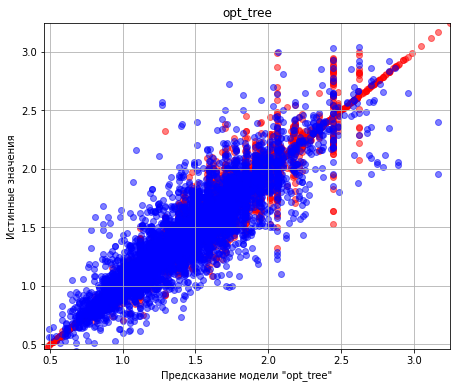

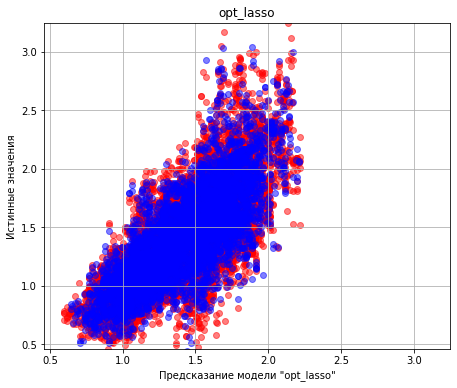

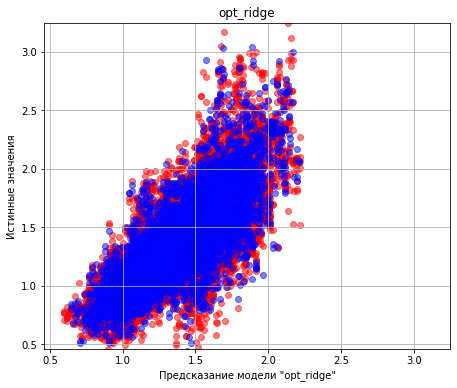

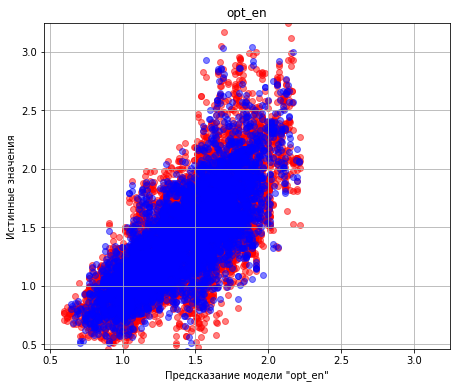

In [209]:
for model in opt_models_y_pred:
    plot_y_vs_y_pred(y_train, y_test, models_y_pred[model][0], models_y_pred[model][1], model)
